#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 13 SVM (aplicadoa los datos de iris) Alumno: Ibarra Ramírez Sergio </font>

Importamos los datos de Iris y los separamos en train y test 

In [1]:
from sklearn.datasets import load_iris

tabla = load_iris(as_frame=True)

y = tabla.frame["target"]
X = tabla.frame.drop(["target"],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2023)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
9,4.9,3.1,1.5,0.1
38,4.4,3.0,1.3,0.2
18,5.7,3.8,1.7,0.3
119,6.0,2.2,5.0,1.5
98,5.1,2.5,3.0,1.1
...,...,...,...,...
52,6.9,3.1,4.9,1.5
116,6.5,3.0,5.5,1.8
3,4.6,3.1,1.5,0.2
25,5.0,3.0,1.6,0.2


Se importa la librería necesaria 

In [3]:
from sklearn.svm import SVC

Se define y entrena el modelo SVM 

In [4]:
modelo_SVM = SVC(C=1,kernel='linear')
modelo_SVM.fit(X_train,y_train)

SVC(C=1, kernel='linear')

Se genera la predicción con el modelo SVM 

In [5]:
y_pred_modelo_SVM = modelo_SVM.predict(X_test)
y_pred_modelo_SVM

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

Se hace la evaluación de las metricas de clasificaicón con classification_report

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_modelo_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Ahora vamos a comparar como se ven los diferentes tipos de Kernel (definiendo en su caso el gama y el coef para cada tipo de kernel) -Dice el profe que el degree, por defecto es 2 -

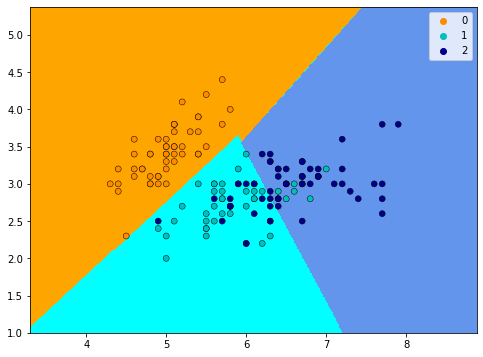

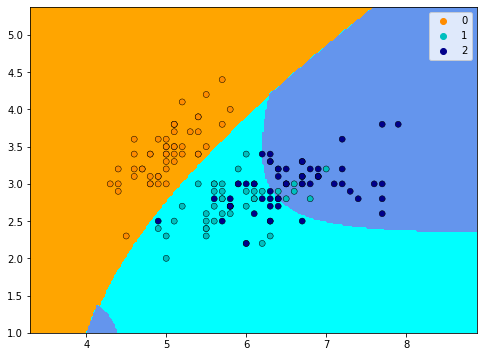

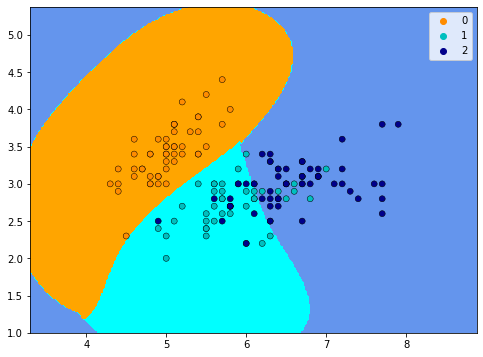

In [8]:
import seaborn as sns
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris = datasets.load_iris()
X,y = load_iris(return_X_y=True)

X = X[:, :2] # Solo las dos primeras dimensiones, no se pueden visualizar más


# Definicion de colores
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for kernel in ["linear", "poly", "rbf"]:
    modelo = SVC(kernel=kernel,gamma=1,coef0=+1)
    modelo.fit(X, y)

    # Bordes y áreas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Puntos
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

plt.show()